# Introduction

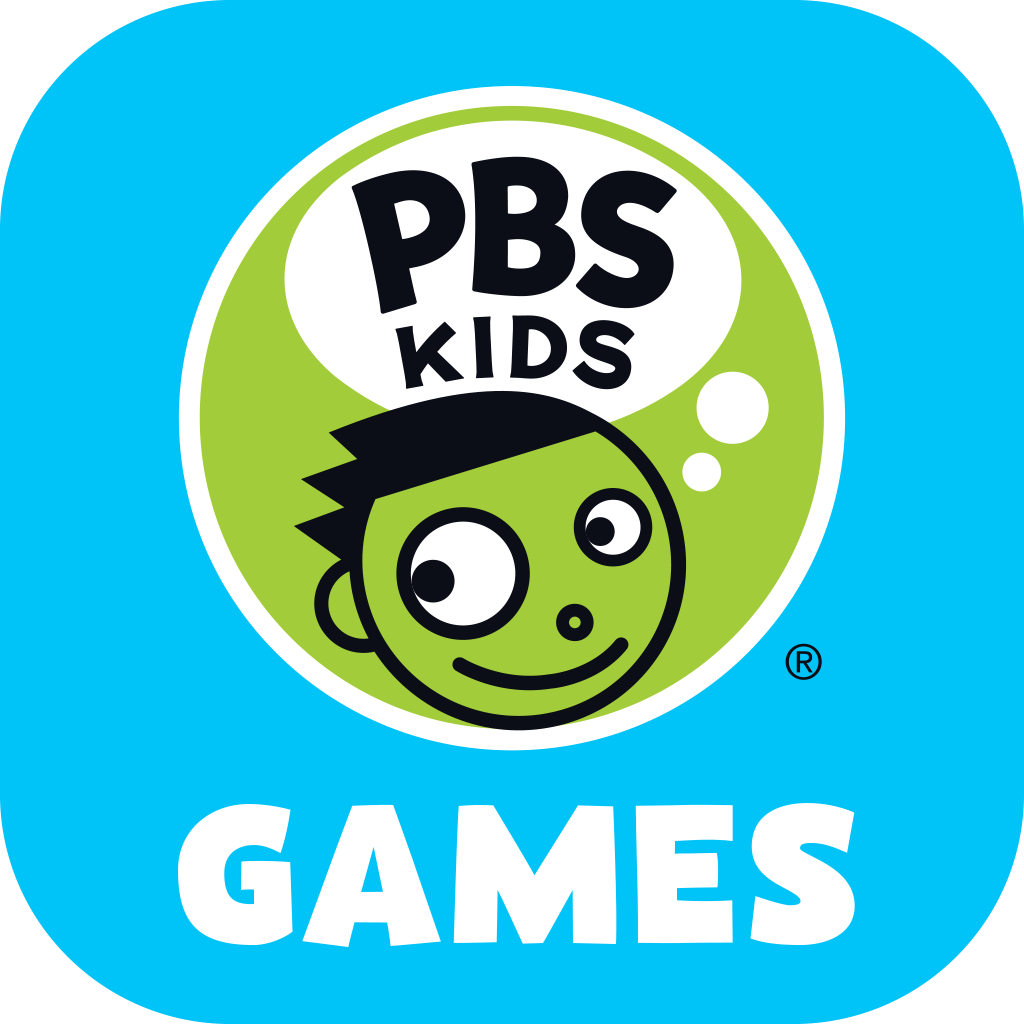

The intent of the competition is to use the gameplay data to forecast how many attempts a child will take to pass a given assessment.


***My Data Exploration would be towards how to view the dataset in terms of improve the game or pointing out the existing games pro's and con's.***

## If you think, this kernel is useful, plz upvote.

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

# Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from plotly.offline import iplot
from plotly import tools
import plotly.graph_objects as go
import plotly.express as px
import plotly.offline as py
import plotly.figure_factory as ff
py.init_notebook_mode(connected=True)
%matplotlib inline 
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import matplotlib.patches as patches
plt.show()
pd.set_option('display.max_rows', 5000)
pd.set_option('display.max_columns', 500)

# Data Loading

In [ ]:

train_data = pd.read_csv("/kaggle/input/data-science-bowl-2019/train.csv")
print("Train Data Size ", train_data.shape)
specs_data = pd.read_csv("/kaggle/input/data-science-bowl-2019/specs.csv")
print("Specs Data size ",specs_data.shape)
train_labels = pd.read_csv('/kaggle/input/data-science-bowl-2019/train_labels.csv')
print("Train Lables size ",train_labels.shape)
test_data = pd.read_csv('/kaggle/input/data-science-bowl-2019/test.csv')
print("Test size ",test_data.shape)
sample_submission = pd.read_csv('/kaggle/input/data-science-bowl-2019/sample_submission.csv')
print("Sample_submission  size ",sample_submission.shape)

In [ ]:
# Features
print("\nTrain_Data columns ",train_data.columns)
print("\nSpecs_Data columns ",specs_data.columns)
print("\nTrain_Labels columns ",train_labels.columns)
print("\nTest_Data columns ",test_data.columns)
print("\nSample_submission columns ",sample_submission.columns)

# Data Exploration

In [ ]:
# explore about Target feature : Accuracy_group
acc_grp = train_labels.groupby(['accuracy_group'])['game_session'].count().reset_index()
display(acc_grp)
fig = go.Figure(data = [go.Pie(labels = acc_grp.accuracy_group,values = acc_grp.game_session)])
fig.show()

## 50% of kids achieved in the first attempt itself.

## 24% of kids failed to clear the assessment in the first attempt itself.

In [ ]:
title_grp = train_labels.groupby(['title'])['game_session'].count().reset_index()
display(title_grp)
fig = go.Figure(data = [go.Pie(labels = title_grp.title,values = title_grp.game_session)])
fig.show()

## Why Chest sorter and Bird Measurer is little low compare to all others? let dig more. 

In [ ]:
game_grp = train_labels.groupby(['title','accuracy_group'])['installation_id'].count().reset_index()
display(game_grp)

In [ ]:
# Plotting with Sunburst Chart
# I manually created this list from the above table data.
fig =go.Figure(go.Sunburst(
    ids = ['Bird Measurer (Assessment)',"BM0","BM1","BM2","BM3",'Cart Balancer (Assessment)',"CB0","CB1","CB2","CB3",'Cauldron Filler (Assessment)',"CF0","CF1","CF2","CF3",'Chest Sorter (Assessment)',"CS0","CS1","CS2","CS3",'Mushroom Sorter (Assessment)', "MS0", "MS1", "MS2", "MS3"],
    labels=['Bird Measurer ',"0","1","2","3",'Cart Balancer ',"0","1","2","3",'Cauldron Filler ',"0","1","2","3", 'Chest Sorter ',"0","1","2","3", 'Mushroom Sorter ', "0", "1", "2", "3"],
    parents=["", "Bird Measurer (Assessment)", 'Bird Measurer (Assessment)', 'Bird Measurer (Assessment)', 'Bird Measurer (Assessment)',"", 'Cart Balancer (Assessment)', 'Cart Balancer (Assessment)', 'Cart Balancer (Assessment)', 'Cart Balancer (Assessment)',"", 'Cauldron Filler (Assessment)', 'Cauldron Filler (Assessment)', 'Cauldron Filler (Assessment)', 'Cauldron Filler (Assessment)',"", 'Chest Sorter (Assessment)', 'Chest Sorter (Assessment)', 'Chest Sorter (Assessment)', 'Chest Sorter (Assessment)', "",'Mushroom Sorter (Assessment)', 'Mushroom Sorter (Assessment)', 'Mushroom Sorter (Assessment)', 'Mushroom Sorter (Assessment)'],
    values=[2746,886, 778, 389, 693, 4151,576, 353, 470, 2752, 4055,421, 459, 630, 2545, 2981,1752, 466, 256, 507, 3757, 594, 355, 460, 2348],
    branchvalues="total",
))
fig.update_layout(margin = dict(t=0, l=0, r=0, b=0))
fig.show()

## Looks like Chest Sorter is toughest and Bird Measurer is tougher. Most of the kids didnt clear the assessment in the first attempt

In [ ]:
# Explore the Train_data with Quntitative and Qualitative variables
print("Qualitative/Categorical Columns:")
cate_cols = train_data.select_dtypes(include=['object']).columns
print(cate_cols)
print("\nQuntitative/Numerical Columns:")
num_cols  = train_data.select_dtypes(exclude = ['object']).columns
print(num_cols)

In [ ]:
# Explore Numercial Variables
train_data.groupby('game_session')['event_count'].count()
game = train_data[train_data['game_session']=='fffe9cd0cc5b076b']
game.shape

In [ ]:
game.head(2)

In [ ]:
print("Unique installation ids:")
print(train_data.installation_id.nunique())
print(train_labels.installation_id.nunique())
print("\nUnique Game Sessions:")
print(train_data.game_session.nunique())
print(train_labels.game_session.nunique())
print("\nUnique Titles:")
print(train_data.title.nunique())
print(train_labels.title.nunique())

In [ ]:
#Merging the Traindata and labels
merge_data = pd.merge(train_data, train_labels, on = ['installation_id','game_session','title'])
print(merge_data.shape)

In [ ]:
merge_data.head(2)

In [ ]:
event_count = train_data['title'].value_counts().reset_index()
event_count['index'] = event_count['index'].astype('category')
#print(event_count)
#fig = go.Figure([go.Bar(x=list(event_count['index']), y=list(event_count['title']))])
fig = px.bar(event_count[0:10], x='index', y='title',
             hover_data=['title'], color='index',
             labels={'title':'Event Count'}, height=400)
fig.show()

## Training : Top 10 games played most. Looks like super intesting games with mostly animals, especially dinosaur.

In [ ]:
event_count = test_data['title'].value_counts().reset_index()
event_count['index'] = event_count['index'].astype('category')
#print(event_count)
#fig = go.Figure([go.Bar(x=list(event_count['index']), y=list(event_count['title']))])
fig = px.bar(event_count[0:10], x='index', y='title',
             hover_data=['title'], color='index',
             labels={'title':'Event Count'}, height=400)
fig.show()

## Test : Top 10 games played most

In [ ]:
fig = px.bar(event_count[-10:], x='index', y='title',
             hover_data=['title'], color='index',
             labels={'title':'Event Count'}, height=400)
fig.show()

## Training : Top 10 least played games. 

In [ ]:
type_count = train_data['type'].value_counts().reset_index()
total = len(train_data)
type_count['percent'] = round((type_count['type']/total)*100,2)
print(type_count)

fig = px.bar(type_count, x='index', y='type',
             hover_data=['index','percent'], color='type',
             labels={'type':'Type Count'}, height=400)
fig.show()

## kids mostly interested in interactive things like Game and Activity. Wathcing videos is boring ;)

In [ ]:
type_count = test_data['type'].value_counts().reset_index()
total = len(test_data)
type_count['percent'] = round((type_count['type']/total)*100,2)
print(type_count)

fig = px.bar(type_count, x='index', y='type',
             hover_data=['index','percent'], color='type',
             labels={'type':'Type Count'}, height=400)
fig.show()

## Both Training and Test dataset has similiar range of game types

In [ ]:
type_count = train_data['world'].value_counts().reset_index()
total = len(train_data)
type_count['percent'] = round((type_count['world']/total)*100,2)
print(type_count)

fig = px.bar(type_count, x='index', y='world',
             hover_data=['index','percent'], color='world',
             labels={'world':'World Count'}, height=400)
fig.show()

## kids are interested in playing games related to hills. so many games provided in that segment.

In [ ]:
type_count = test_data['world'].value_counts().reset_index()
total = len(test_data)
type_count['percent'] = round((type_count['world']/total)*100,2)
print(type_count)

fig = px.bar(type_count, x='index', y='world',
             hover_data=['index','percent'], color='world',
             labels={'world':'World Count'}, height=400)
fig.show()

In [ ]:
train_data['timestamp'] = pd.to_datetime(train_data['timestamp'])
train_data['date'] = train_data['timestamp'].dt.date
train_data['month'] = train_data['timestamp'].dt.month
train_data['hour'] = train_data['timestamp'].dt.hour
train_data['year'] = train_data['timestamp'].dt.year
train_data['dayofweek'] = train_data['timestamp'].dt.dayofweek
train_data['weekofyear'] = train_data['timestamp'].dt.weekofyear
train_data['dayofyear'] = train_data['timestamp'].dt.dayofyear
train_data['quarter'] = train_data['timestamp'].dt.quarter
train_data['is_month_start'] = train_data['timestamp'].dt.is_month_start

In [ ]:
print(train_data['year'].unique())
print(train_data['month'].unique())
print(train_data['date'].nunique())

In [ ]:
month_count = train_data.groupby(['month'])['installation_id'].count().reset_index()
total = len(train_data)
month_count['percent'] = round((month_count['installation_id']/total)*100,2)
fig = px.bar(month_count, x='month', y='installation_id',
             hover_data=['month','percent'], color='installation_id',
             labels={'installation_id':'Installation Count'}, height=400)
fig.show()

## definitly there should be an offer or an event must happend.

In [ ]:
date_count = train_data.groupby(['date'])['installation_id'].count().reset_index()
fig = go.Figure(data=go.Scatter(x=date_count['date'], y=date_count['installation_id']))
fig.show()

## Peak installation was September 27th. Because of this: PBS KIDS Family Event At O'Neill Public Library.

In [ ]:
hour_count = train_data.groupby(['hour'])['installation_id'].count().reset_index()
fig = go.Figure(data=go.Scatter(x=hour_count['hour'], y=hour_count['installation_id']))
fig.show()

## Peak time was 7 in the evening. Most of the kids started playing at 10 in the morning and gradually increased upto night 11. even few kids played the game at 1AM. It may be because of timezone change or that game not played by the parent not by kid. ;)

In [ ]:
week_count = train_data.groupby(['weekofyear'])['installation_id'].count().reset_index()
fig = go.Figure(data=go.Scatter(x=week_count['weekofyear'], y=week_count['installation_id']))
fig.show()

## September last week. Already we knew the reason.

In [ ]:
week_type_count = train_data.groupby(['weekofyear','type'])['installation_id'].count().reset_index()
#print(week_type_count)
fig = px.line(week_type_count, x="weekofyear", y="installation_id", color='type')
fig.show()

In [ ]:
date_type_count = train_data.groupby(['date','type'])['installation_id'].count().reset_index()
fig = px.line(date_type_count, x="date", y="installation_id", color='type')
fig.show()

## one thing to note on Sep 27th, Games and Activity high, but the Assessment is low.

In [ ]:
merge_data['timestamp'] = pd.to_datetime(merge_data['timestamp'])
merge_data['date'] = merge_data['timestamp'].dt.date
merge_data['month'] = merge_data['timestamp'].dt.month
merge_data['hour'] = merge_data['timestamp'].dt.hour
merge_data['year'] = merge_data['timestamp'].dt.year
merge_data['dayofweek'] = merge_data['timestamp'].dt.dayofweek
merge_data['weekofyear'] = merge_data['timestamp'].dt.weekofyear
merge_data['dayofyear'] = merge_data['timestamp'].dt.dayofyear
merge_data['quarter'] = merge_data['timestamp'].dt.quarter
merge_data['is_month_start'] = merge_data['timestamp'].dt.is_month_start

In [ ]:
date_title_count = merge_data.groupby(['dayofweek','title'])['game_session'].count().reset_index()
fig = px.line(date_title_count, x="dayofweek", y="game_session", color='title')
fig.show()

## most assessment happened in 5th day of a week. Weekend happiness :)

In [ ]:
date_title_count = merge_data.groupby(['hour','title'])['game_session'].count().reset_index()
fig = px.line(date_title_count, x="hour", y="game_session", color='title')
fig.show()

## In a day most of the assessment happened for 3PM ot 12PM.

In [ ]:
date_title_count = merge_data.groupby(['title'])['game_time'].count().reset_index()
print(date_title_count)
fig = px.line(date_title_count, x="title", y="game_time")
fig.show()

## Except Cart Balancer All other game have high time. because it is easiest. High number of first attempt winners are belonged to this Title.

In [ ]:
date_title_count = test_data.groupby(['title'])['game_time'].count().reset_index()
date_title_count.sort_values(by=['game_time'], inplace = True, ascending = True)
print(date_title_count)
fig = px.line(date_title_count, x="title", y="game_time")
fig.show()

## Activity based games are played most.

In [ ]:
merge_data.dtypes

In [ ]:
merge_data['event_code'] = merge_data['event_code'].astype('category')
event_count = merge_data.groupby(['event_code'])['event_count'].count().reset_index()
event_count.sort_values(by = ['event_count'], inplace = True)
print(event_count)

plt.figure(figsize=(20,10))
ax = sns.barplot(x='event_code', y='event_count', data=event_count)
ax

## two event codes having highest count. let explore further.

In [ ]:
data = train_data[train_data['event_code']==4030]
data.shape
print(data['title'].value_counts())
print(data['type'].value_counts())
print(data['world'].value_counts())

In [ ]:
game= train_data.groupby(['world'])['game_time'].max().reset_index()
game.sort_values(by = ['game_time'], inplace = True, ascending=False)
fig = px.bar(game, x='world', y='game_time',
             hover_data=['world'], color='game_time',
             labels={'game_time':'Game Time'}, height=400)
fig.show()

## Highest game time took by TREETOPCITY

In [ ]:
game= train_data.groupby(['title'])['game_time'].max().reset_index()
game.sort_values(by = ['game_time'], inplace = True, ascending=False)
fig = px.bar(game[0:10], x='game_time', y='title', orientation = 'h',
             hover_data=['title'], color='game_time',
             labels={'game_time':'Game Time'}, height=400)
fig.show()

## Top 10 Time consumed Games.

In [ ]:
# Correlation 
train_data.dtypes

In [ ]:
#sns.pairplot(merge_data[['event_count','game_time']])
#sns.show()
#merge_data['game_session'].value_counts()
game_sess = merge_data[merge_data['game_session']=='a229f001486f628c']
game_sess.shape
fig = px.scatter(game_sess, x="event_count", y="game_time")
fig.show()

## Event Count and Game Time is highly correlated(Common one ;))

In [ ]:
world_type = train_data.groupby(['world','type'])['game_session'].count().reset_index()
world_type
plt.figure(figsize=(20,7))
ax = sns.barplot(x="world", y="game_session", hue="type", data=world_type)

## Good number of games and activities in each world. Introduction world is having only videos.

In [ ]:
world_type = train_data.groupby(['world','type'])['game_time'].mean().reset_index()
world_type
plt.figure(figsize=(20,7))
ax = sns.barplot(x="world", y="game_time", hue="type", data=world_type)

## In all 3 world, the Assessment time is almost same. then Game and Activity. It depends on how many sub categories inside game and activity.

In [ ]:
world_type = train_data.groupby(['world','type'])['event_count'].count().reset_index()
world_type
plt.figure(figsize=(20,7))
ax = sns.barplot(x="world", y="event_count", hue="type", data=world_type)

## Based on the previous chart, even its correlated(game time and event count) few cases are having little high game time.

In [ ]:
world_type = merge_data.groupby(['world','title'])['game_session'].count().reset_index()
world_type
plt.figure(figsize=(20,7))
ax = sns.barplot(x="world", y="game_session", hue="title", data=world_type)

## In terms of assessment, each world is having its own Title. title is not common to all world

In [ ]:
# getting unique counts
def get_unique(data, feat):
    return data[feat].nunique()

for col in train_labels.columns.values:
    print("unique number of values in ",col)
    print(get_unique(train_labels,col))

In [ ]:
for col in train_data.columns.values:
    print("unique number of values in ",col)
    print(get_unique(train_data,col))

In [ ]:
max_play = merge_data.groupby(['installation_id'])['event_count'].max().reset_index()
max_play.sort_values(by = ['event_count'], inplace = True, ascending = False)
print(max_play[0:10])

fig = px.bar(max_play[0:10], x='event_count', y='installation_id', orientation = 'h',
             hover_data=['installation_id'], color='installation_id',
             labels={'event_count':'Event Count'}, height=400, title = 'Higher games played in a device')
fig.show()

In [ ]:
min_play = merge_data.groupby(['installation_id'])['event_count'].min().reset_index()
min_play.sort_values(by = ['event_count'], inplace = True, ascending = True)
min_play

fig = px.bar(min_play[0:10], x='installation_id', y='event_count',
             hover_data=['installation_id'], color='installation_id',
             labels={'event_count':'Event Count'}, height=400)
fig.show()

In [ ]:
min_play['event_count'].value_counts()

## 3614 kids are just installed the app and not even played a single game or watched a video.

In [ ]:
one = train_data.query('installation_id=="d0fe2b52"')
one.shape

In [ ]:
merge_data.query('installation_id=="d0fe2b52"').head(1)

In [ ]:
data_2000 = train_data[train_data['event_code']==2000]
world_event = data_2000.groupby(['world'])['event_code'].value_counts()
world_event

In [ ]:
ass_data = merge_data.groupby(['world'])['event_id'].count()
ass_data

## Based on the above two table, kids who entered the game, minimum 2 times attended the assesment by average. 

In [ ]:

max_game = train_data.groupby(['game_session'])['game_time'].max().reset_index()
max_game.sort_values(by=['game_time'], inplace= True, ascending = False)

max_game['hrs'] =  pd.to_timedelta(max_game['game_time'], unit='ms')
print(max_game['hrs'][0:10])

# Top 10 games session active for 3 days.

In [ ]:
evnt_time = train_data.groupby('event_code')['game_time'].max().reset_index()
evnt_time.sort_values(by = ['game_time'], inplace = True, ascending = False)
evnt_time
plt.figure(figsize=(20,7))
ax = sns.barplot(x="event_code", y="game_time", hue="event_code", data=evnt_time[0:10])

In [ ]:
corr_data = merge_data.corr()
plt.figure(figsize=(20,20))
ax = sns.heatmap(
    corr_data, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

## Date and Accuracy related features having high correlation. all others are not correlated. It is good to use Random Forest which is good with non-correlated features.

In [ ]:
# Exploring Test Dataset.
test_data.shape
title_ins = test_data.groupby('title')['game_session'].count().reset_index()
title_ins.sort_values(by=['game_session'], inplace = True, ascending = False)
print(title_ins[0:10])

fig = px.bar(title_ins[0:10], x='title', y='game_session',
             hover_data=['title'], color='title',
             labels={'game_session':'Event Count'}, height=400, title = 'Highly played Games')
fig.show()

In [ ]:
title_game = train_data.groupby(['title'])['game_time'].mean().reset_index()
title_game.sort_values(by=['game_time'], inplace = True, ascending =False)
title_game

In [ ]:
fig = px.bar(title_game[0:25], x="game_time", y="title", orientation='h', title = 'Top Titles with game time')
fig.show()

In [ ]:
train_data.columns

In [ ]:
test_data['timestamp'] = pd.to_datetime(test_data['timestamp'])
test_data['date'] = test_data['timestamp'].dt.date
test_data['month'] = test_data['timestamp'].dt.month
test_data['hour'] = test_data['timestamp'].dt.hour
test_data['year'] = test_data['timestamp'].dt.year
test_data['dayofweek'] = test_data['timestamp'].dt.dayofweek
test_data['weekofyear'] = test_data['timestamp'].dt.weekofyear
test_data['dayofyear'] = test_data['timestamp'].dt.dayofyear
test_data['quarter'] = test_data['timestamp'].dt.quarter
test_data['is_month_start'] = test_data['timestamp'].dt.is_month_start

In [ ]:
dd = test_data.groupby('date')['type'].value_counts()
dd = dd.reset_index(name='count')
dd
fig = px.line(dd, x="date", y="count", color='type')
fig.show()

In [ ]:
dd = train_data.groupby('date')['type'].value_counts()
dd = dd.reset_index(name='count')
dd
fig = px.line(dd, x="date", y="count", color='type')
fig.show()

## Almost similar trend in type from Train and Test

In [ ]:
dd = test_data.groupby('date')['world'].value_counts()
dd = dd.reset_index(name='count')
dd
fig = px.line(dd, x="date", y="count", color='world')
fig.show()

In [ ]:
dd = train_data.groupby('date')['world'].value_counts()
dd = dd.reset_index(name='count')
dd
fig = px.line(dd, x="date", y="count", color='world')
fig.show()

## Similar trend in World too.

# More to explore....

## Similar Kernals : https://www.kaggle.com/c/data-science-bowl-2019/discussion/122039

## you like it plz **upvote**

## you have suggestions to improve, please **comment**

# Happy Learning :)